## Import Pandas and Numpy Libraries

In [280]:
import pandas as pd
import numpy as np

In [281]:
!ls

'assignment solution.docx'   hw1.pdf  'Titanic Dataset Preprocessessing.ipynb'
'helpful for DL.txt'	     titanic


## Loading train and test csv files. Then combining them together to get a combine dataset. Then calling .head() method to see the overview of the features

In [282]:
train_df=pd.read_csv('titanic/train.csv')
test_df=pd.read_csv('titanic/test.csv')

In [283]:
combine = [train_df, test_df]

In [284]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Seeing the columns heading for the dataset, there data types and selecting data based on there data types.

In [285]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [286]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [287]:
dtype1=train_df.select_dtypes(include=['object'])
print(dtype1.columns)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [288]:
dtype2=train_df.select_dtypes(include=['float64','int64'])
print(dtype2.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')


In [289]:
from pandas.api.types import infer_dtype
infer_dtype(train_df.Cabin,skipna=False)
for i in train_df:
    print(infer_dtype(train_df[i],skipna=False))

integer
integer
integer
string
string
floating
integer
integer
string
floating
mixed
mixed


## Seeing if there are any null values in the dataset.

In [290]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [291]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [292]:
train_df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [293]:
np.where(pd.isnull(train_df))

(array([  0,   2,   4,   5,   5,   7,   8,   9,  12,  13,  14,  15,  16,
         17,  17,  18,  19,  19,  20,  22,  24,  25,  26,  26,  28,  28,
         29,  29,  30,  31,  32,  32,  33,  34,  35,  36,  36,  37,  38,
         39,  40,  41,  42,  42,  43,  44,  45,  45,  46,  46,  47,  47,
         48,  48,  49,  50,  51,  53,  55,  56,  57,  58,  59,  60,  61,
         63,  64,  64,  65,  65,  67,  68,  69,  70,  71,  72,  73,  74,
         76,  76,  77,  77,  78,  79,  80,  81,  82,  82,  83,  84,  85,
         86,  87,  87,  89,  90,  91,  93,  94,  95,  95,  98,  99, 100,
        101, 101, 103, 104, 105, 106, 107, 107, 108, 109, 109, 111, 112,
        113, 114, 115, 116, 117, 119, 120, 121, 121, 122, 125, 126, 126,
        127, 128, 129, 130, 131, 132, 133, 134, 135, 138, 140, 140, 141,
        142, 143, 144, 145, 146, 147, 149, 150, 152, 153, 154, 154, 155,
        156, 157, 158, 158, 159, 159, 160, 161, 162, 163, 164, 165, 166,
        167, 168, 168, 169, 171, 172, 173, 175, 176

In [294]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Observing different information about the dataset using different methods provided by pandas library like describe, info, count etc.

In [295]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [296]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [297]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [298]:
#count, unique, top, freq
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [299]:
print(
#train_df.Name.unique(),
train_df.Pclass.unique())

#train_df.Ticket.unique())
#train_df.Fare.unique())


[3 1 2]


In [300]:
train_df.corr()
#train_df['Pclass'].corrwith(train_df['Survived'],axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

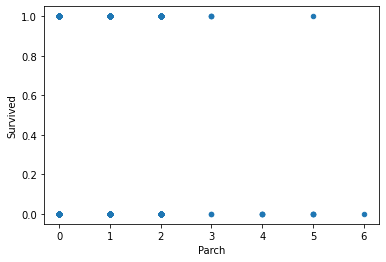

In [301]:
train_df.plot(x="Parch", y="Survived",kind="scatter")

In [302]:
train_df.Pclass.mode()

0    3
dtype: int64

In [303]:
train_df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

## Doing Data visualization using Seaborn library. Histogram to see who survived base on there Pclass,Sex , Age.

In [304]:
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

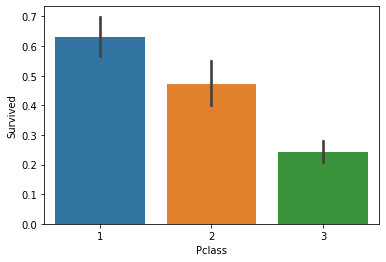

In [305]:
sns.barplot(x='Pclass', y='Survived', data=train_df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

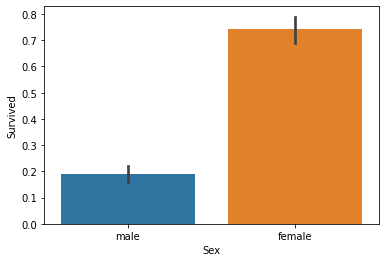

In [306]:
sns.barplot(x='Sex', y='Survived', data=train_df)

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

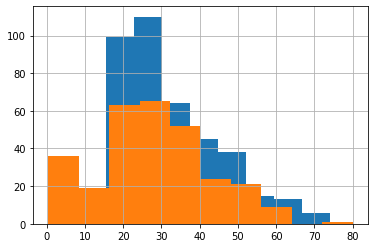

In [307]:
train_df.groupby('Survived').Age.hist()


<AxesSubplot:>

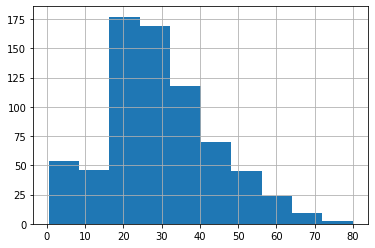

In [308]:
train_df['Age'].hist(bins=10)

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

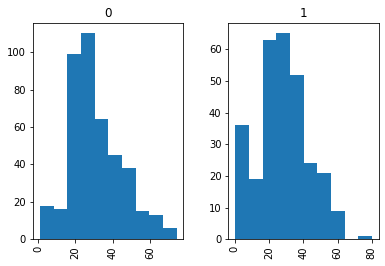

In [309]:
train_df['Age'].hist(by=train_df['Survived'])

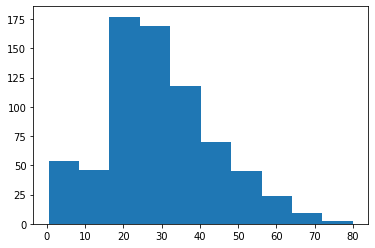

In [310]:
import matplotlib.pyplot as plt 
plt.figure()
plt.hist(train_df['Age'])
plt.show()

## Seeing corelation between Age and Pclass with Survived features using histograms.

/home/fawad/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


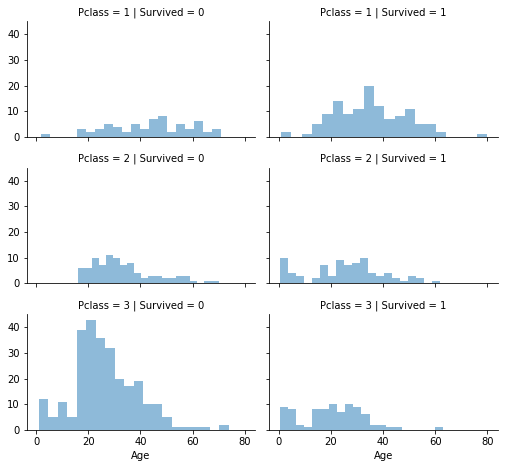

In [311]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

/home/fawad/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/home/fawad/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


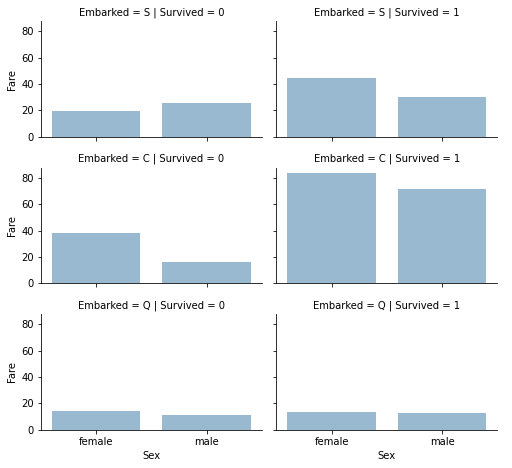

In [312]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

## Duplicated values are removed. 

In [313]:
train_df['Ticket'].duplicated().sum()

210

In [314]:
train_df.duplicated(subset=['Ticket'])

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Length: 891, dtype: bool

In [315]:
train_df['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [316]:
train_df['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [317]:
train_df['Cabin'].isnull().sum()

687

In [318]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

## In order to convert a categorical value into numerical values for better calculations, The feature Sex is converted into Gender where female=1 and male=0 

In [319]:
Gender={'female':1,'male':0}
Gender=train_df['Sex'].map(Gender)
train_df['Gender'] = Gender
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0


In [320]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Gender         891
dtype: int64

In [321]:
train_df['Sex'].isnull().sum()

0

## Filling in the missing data in Age feature by generating random numbers between Mean and Standard Deviation. Also for embarked and Fare the most occuring value is used to fill in the missing values. 

In [322]:
mean=train_df.mean()
stnd=train_df.std()
print(mean.Age)
print(stnd.Age)

29.69911764705882
14.526497332334044


In [323]:
train_df['Age'].isnull().sum()

177

In [324]:
filldata=np.random.uniform(mean.Age,stnd.Age)
print(filldata)

27.510879580546


In [325]:
train_df['Age'].fillna(value=np.random.uniform(mean.Age,stnd.Age))

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    16.731881
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [326]:
train_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
Gender         891
dtype: int64

In [327]:
mode_Embarked=train_df['Embarked'].mode()
mode_fare=train_df['Fare'].mode()
print(mode_fare)
print(mode_Embarked)

0    8.05
dtype: float64
0    S
dtype: object


In [328]:
train_df['Embarked'].fillna(value=mode_Embarked)

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [329]:
train_df['Fare'].fillna(value=mode_fare)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

In [334]:
train_df['Fare'].isnull().sum()

0

## Fare feature to ordinal values based on the FareBand Given

In [331]:
pd.cut(train_df['Fare'], bins=[0, 8, 15, 32, 100, 600]).value_counts()

(0, 8]        226
(15, 32]      222
(8, 15]       217
(32, 100]     158
(100, 600]     53
Name: Fare, dtype: int64

In [332]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [333]:
#train_df.describe().transpose()[['mean', 'std']]